In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import the dataset
df = pd.read_csv('iris.csv')
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [53]:
X = df.iloc[:, [0,1,2,3]].values    #extract only values from dataframe
X.shape                             # 150 examples 4 feutures

(150, 4)

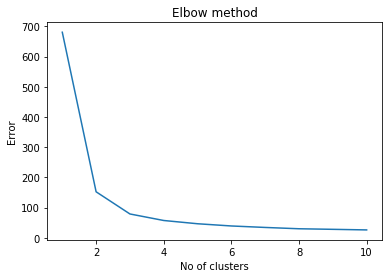

In [82]:
from sklearn.cluster import KMeans
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)     #Elbow method is done to get correct no.of clusters possible for given data(chosen as per user also)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')     #plot is drawn between cost function error in kmeans algorithm and no.of clusters
plt.ylabel('Error')
plt.show()       #optimum value is taken at the elbow of the curve which is between 2 and 4 ; taken 3


[[5.3 3.7 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [6.3 3.3 6.  2.5]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


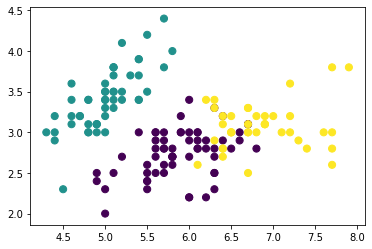

In [79]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    i= np.array([48,4,100])           #choose any fixed random indices
    centers = X[i,:]                   #extract the whole row as centers initially
    print(centers)
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)    #claculate distance and assign it to label with which it has minimum distance
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == j].mean(0)     #update new center with the mean value of the points
                             for j in range(n_clusters)])
        # 2c. Check for convergence
        if np.all(centers == new_centers):             #converge upto all centers are iterated
            break
        centers = new_centers
              
    return centers, labels

centers,labels=find_clusters(X,3)
print(labels)
plt.scatter(X[:, 0], X[:, 1], c=labels,         #plot between any two feauture(bcoz it is 2D) with the label as colour constraint 
           s=50, cmap='viridis');


[[6.4 3.2 4.5 1.5]
 [5.5 2.4 3.7 1. ]
 [5.5 3.5 1.3 0.2]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.418      1.464      0.244     ]]


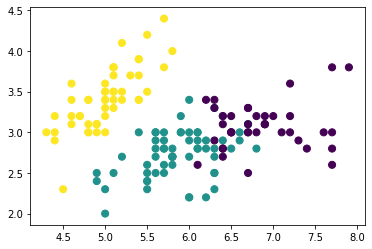

In [81]:
#the same code can be implemented by using random function to generate indices for random centers
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    i= np.random.randint(1,X.shape[0],n_clusters)
    centers = X[i]
    print(centers)
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                               for i in range(n_clusters)])
                # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
              
    return centers, labels

centers,labels=find_clusters(X, 3)
print(labels)
print(centers)
plt.scatter(X[:, 0], X[:, 1], c=labels,
           s=50, cmap='viridis');
